In [24]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

In [26]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
print(housing.DESCR)
type(housing)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

sklearn.utils._bunch.Bunch

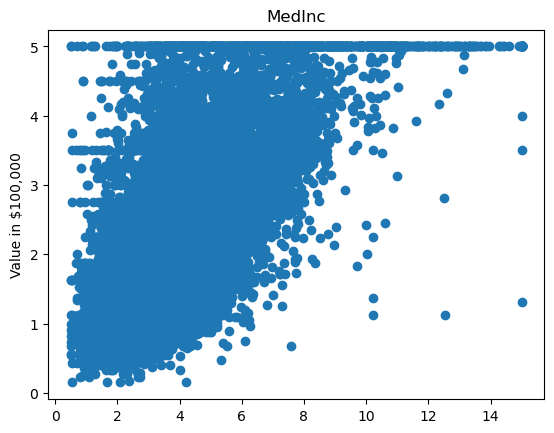

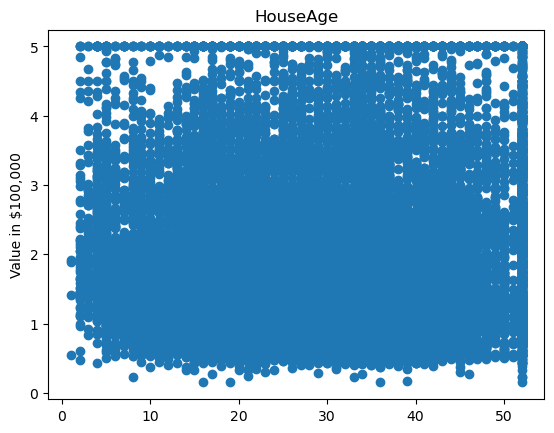

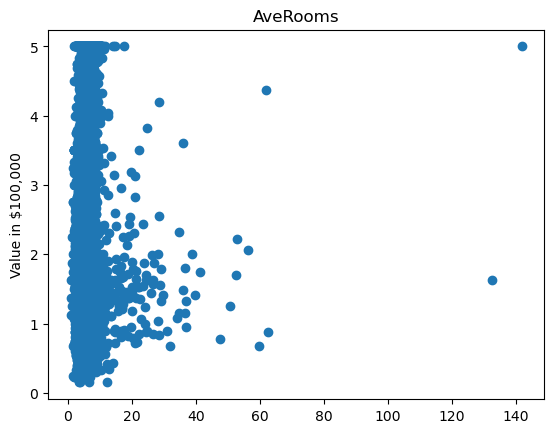

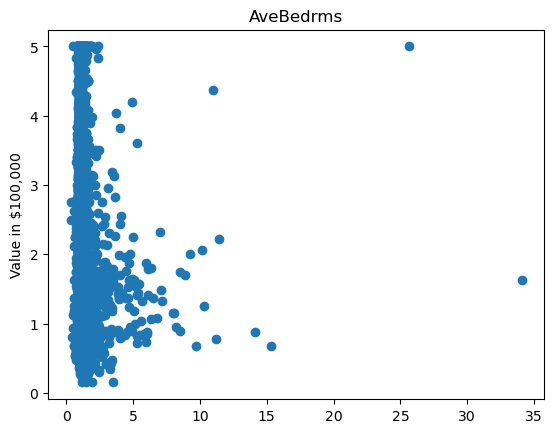

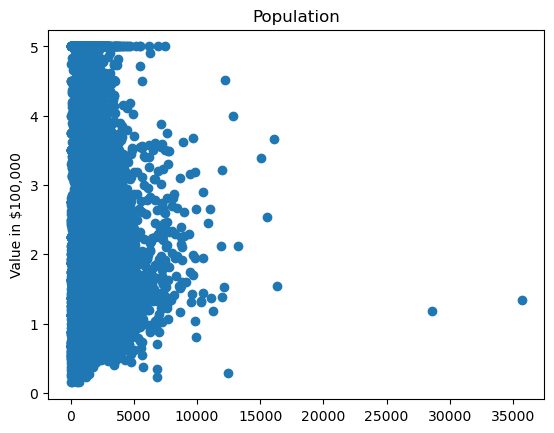

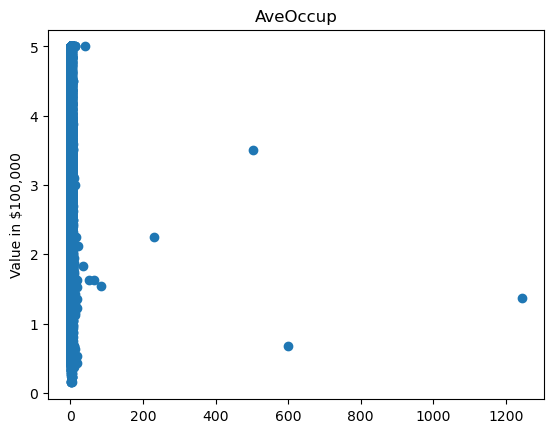

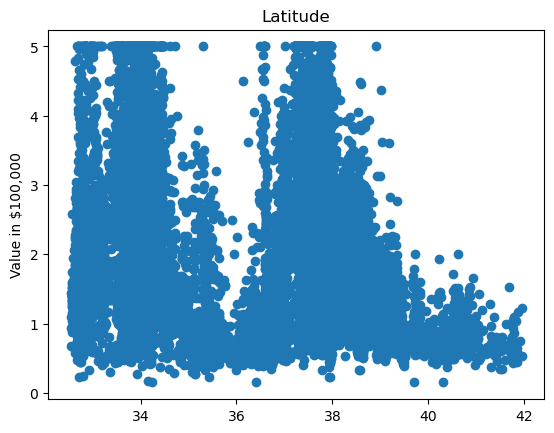

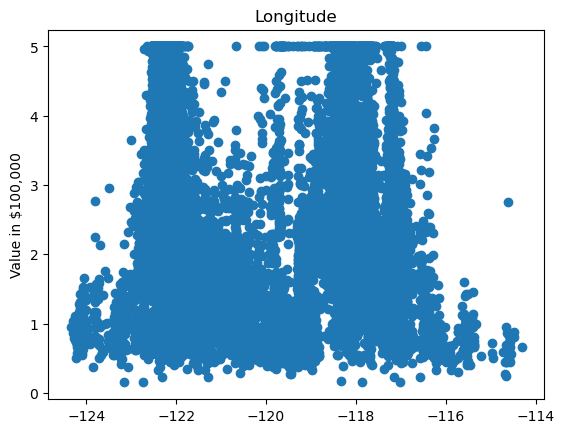

In [27]:
#Visual inspection of the data


for i in range(X.shape[1]):
    plt.scatter(X[:,i],y)
    plt.title(housing.feature_names[i])
    plt.ylabel('Value in $100,000')
    plt.show()

We first train a model using all the data

In [28]:
#Train a model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X,y)


LinearRegression()

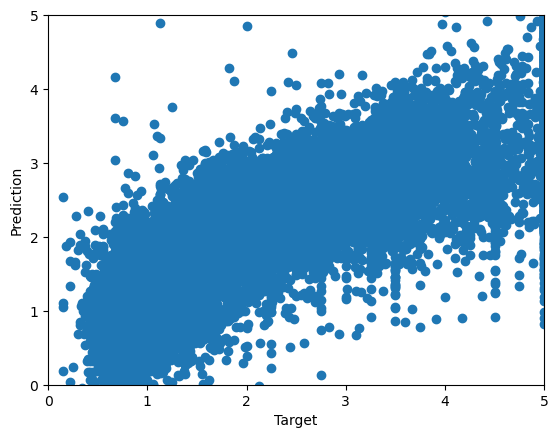

In [5]:
# Visual result
y_predict_lin = reg.predict(X)
plt.scatter(y,y_predict_lin)
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.xlim([0,5])
plt.ylim([0,5])

plt.show()

Now, we split the data into training and validation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Split into training and validation set
# the test_size is the proportion of samples to be put into the validation set
# the random_state is initialziing the random generator to have reproducible results
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=40)

In [31]:
# We train on the training set only
reg.fit(X_train, y_train)

#Predict for both dataset
y_train_predict_lin = reg.predict(X_train)
y_val_predict_lin = reg.predict(X_val)



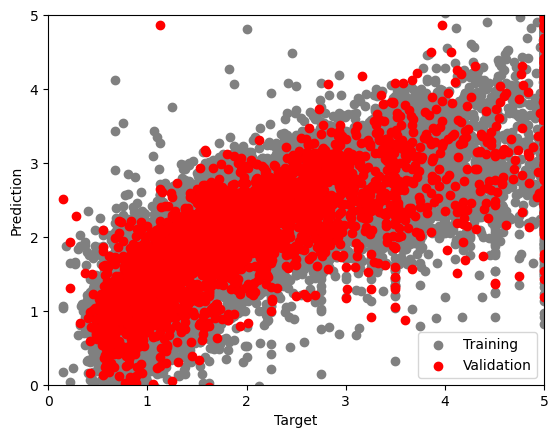

In [9]:
# Plot the result

plt.scatter(y_train,y_train_predict_lin,color='gray',label='Training')
plt.scatter(y_val,y_val_predict_lin,color='red',label='Validation')
plt.legend()
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.xlim([0,5])
plt.ylim([0,5])

plt.show()


In [32]:
#Score
from sklearn.metrics import mean_squared_error, make_scorer
score = make_scorer(mean_squared_error)
mon = lambda score: f'{100000*score:,.0f} $'

print(f'Score on training: {mon(score(reg,X_train, y_train))}')
print(f'Score on validation: {mon(score(reg,X_val, y_val))}')

Score on training: 51,943 $
Score on validation: 55,335 $


We now use cross validation

In [33]:
from sklearn.model_selection import cross_val_score

score_lin = cross_val_score(reg,X,y,cv = 5, scoring=score)
print(f'Score: {mon(score_lin.mean())} +/- {mon(score_lin.std())}')

Score: 55,829 $ +/- 6,560 $


In [34]:
100000*score_lin

array([48485.85674573, 62249.73867349, 64621.04728578, 54319.95961545,
       49468.48356388])

Coefficients of the linear model:

In [35]:
reg.coef_

array([ 4.32523324e-01,  9.26605052e-03, -1.01473726e-01,  6.10095638e-01,
       -4.50196511e-06, -4.88043332e-03, -4.21388166e-01, -4.34234145e-01])

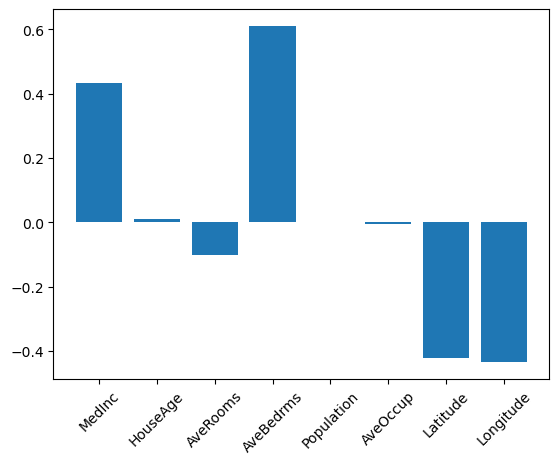

In [36]:
plt.bar(np.arange(0,len(housing.feature_names)),reg.coef_)
plt.xticks(ticks=np.arange(0,len(housing.feature_names)),labels=housing.feature_names, rotation=45);


We try now the lasso regression

In [37]:
from sklearn.linear_model import LassoCV

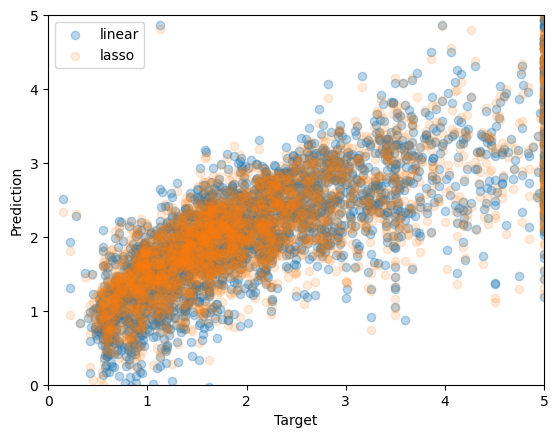

In [38]:
lasso = LassoCV(cv=5, random_state=1).fit(X_train, y_train)
y_val_predict_lasso = lasso.predict(X_val)
plt.scatter(y_val,y_val_predict_lin,label='linear',zorder=1,alpha=.3)
plt.scatter(y_val,y_val_predict_lasso,label='lasso',zorder=2,alpha=.15)
plt.legend()
plt.xlim([0,5])
plt.ylim([0,5])
plt.ylabel('Prediction')
plt.xlabel('Target')
plt.show()

In [39]:
print(f'Lasso regularization coefficient:{lasso.alpha_:.2e}')


Lasso regularization coefficient:3.27e-02


Compare the score of the two linear models:

In [40]:
print(f'Score on validation of the simple linear model: {mon(score(reg,X_val, y_val))}')
print(f'Score on validation of the lasso linear model: {mon(score(lasso,X_val, y_val))}')

Score on validation of the simple linear model: 55,335 $
Score on validation of the lasso linear model: 58,122 $


Coefficients of the laso model:

In [42]:
lasso.coef_

array([ 3.80269217e-01,  1.11177170e-02,  3.25313073e-03,  0.00000000e+00,
        1.48208724e-06, -4.70537339e-03, -3.36572656e-01, -3.37109647e-01])

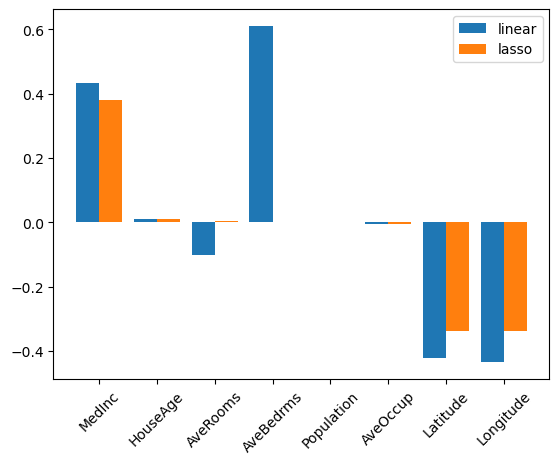

In [43]:
# Compare the coefficents with the linear model
plt.bar(np.arange(0,len(housing.feature_names))-.2,reg.coef_,width=.4,label='linear')
plt.bar(np.arange(0,len(housing.feature_names))+.2,lasso.coef_,width=.4, label='lasso')
plt.legend()
plt.xticks(ticks=np.arange(0,len(housing.feature_names)),labels=housing.feature_names, rotation=45);

We can compare the score with another fancier model

In [44]:
# Try a fancier model ?
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_features=10, random_state=10)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=10, random_state=10)

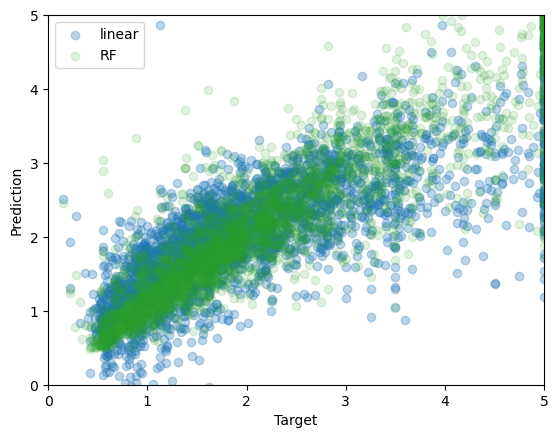

In [45]:
y_val_predict_rf = rf.predict(X_val)
plt.scatter(y_val,y_val_predict_lin,label='linear',zorder=1,alpha=.3)
plt.scatter(y_val,y_val_predict_rf,label='RF',zorder=2,color='C2', alpha=.15)
plt.legend()

plt.ylabel('Prediction')
plt.xlabel('Target')
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [46]:
# Cross Validation score
print(f'Score on validation of the simple linear model: {mon(score(reg,X_val, y_val))}')
print(f'Score on validation of the random forest: {mon(score(rf,X_val, y_val))}')

Score on validation of the simple linear model: 55,335 $
Score on validation of the random forest: 27,246 $
